## FEATURE ENGINEERING & REGRESSION MODELLING

18 January 2023, https://ds.codeup.com/regression/feature-engineering/
    


In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures

# dataset and functions
from regprepare import get_auto_mpg, train_val_test

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = get_auto_mpg()
df.head(3)

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""


In [3]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

### This time we will scale our data

Do not need to scale target variable. Here, our target variable, the y-value, is 'mpg'.


In [4]:
# scaling the data in specific columns, reassigning the scaled numbers to the column names

mms = MinMaxScaler()

train[['displ', 'horsepower', 'weight', 'acc']] = mms.fit_transform(train[['displ', 'horsepower', 'weight', 'acc']])

train.head(3)

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
212,16.5,8,0.727273,0.725275,0.784519,0.244048,76,1,"""cadillac seville"""
346,32.3,4,0.070130,0.104396,0.128154,0.583333,81,3,"""subaru"""
325,44.3,4,0.051948,0.000000,0.133825,0.815476,80,2,"""vw rabbit c (diesel)"""


### SelectKBest

This happens on the front end. Can be done without introducing a machine learning model. Based on a statistical test to identify features that have the closest relationship to the target variable.  

```f_regression``` test is used to help determine feature significance.  

```SelectKBest(stats test, k = num features to return)```  

SelectKBest is fit to the data.  

```get_support()``` to generate mask for column names.  

In [5]:
# subset the feature data
# feature array / df with continuous features (X) and target (y)

X_train_scaled = train[['displ', 'horsepower', 'weight', 'acc']]
y_train = train['mpg']

In [6]:
# create an instance of the SelectKBest object

# use the f_reg stats test, k = select the 2 top features out of our 4 features

f_selector = SelectKBest(f_regression, k = 2)

In [7]:
# fit the object to data : .fit(features, target variable)

f_selector.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x161ada4c0>)

In [8]:
# get support method tells us what variables are true (useful) and false (not useful)

f_selector.get_support()

array([ True, False,  True, False])

In [9]:
# see how the get_support lines up with columns

X_train_scaled.columns

Index(['displ', 'horsepower', 'weight', 'acc'], dtype='object')

In [10]:
# masking the values by assigning a variable to the T/F in order to apply it to the columns

f_sel_mask = f_selector.get_support()

In [11]:
# see only the column names relevant to our analysis

X_train_scaled.columns[f_sel_mask]

Index(['displ', 'weight'], dtype='object')

In [12]:
X_train_scaled.iloc[:, f_sel_mask].head()

# .iloc[rows to select, boolean mask] = in order to mask column-wise, keeping only the desired columns

,displ,weight
212,0.727273,0.784519
346,0.070130,0.128154
325,0.051948,0.133825
90,0.932468,0.946697
246,0.020779,0.105472


In [13]:
# an alternate way to get only the mosta important features : 
# doesn't give us the column names, but it gives us the data itself that forms the columns`

f_selector.transform(X_train_scaled)

array([[0.72727273, 0.78451942],
       [0.07012987, 0.12815424],
       [0.05194805, 0.13382478],
       [0.93246753, 0.94669691],
       [0.02077922, 0.10547207],
       [0.12987013, 0.24836972],
       [0.6025974 , 0.45137511],
       [0.64415584, 0.74397505],
       [0.85714286, 0.79642756],
       [0.72727273, 0.58151403],
       [0.4025974 , 0.42755883],
       [0.03376623, 0.11057556],
       [0.18441558, 0.4471222 ],
       [0.46753247, 0.47207258],
       [0.46753247, 0.54068614],
       [0.72727273, 0.80606748],
       [0.13246753, 0.17607031],
       [0.72727273, 0.73603629],
       [0.05194805, 0.14516586],
       [0.22337662, 0.33853133],
       [0.72727273, 0.81910972],
       [0.16883117, 0.24865325],
       [0.16883117, 0.25857669],
       [0.4025974 , 0.50127587],
       [0.21038961, 0.30195634],
       [0.21038961, 0.3790757 ],
       [0.42077922, 0.36518287],
       [0.11948052, 0.17947264],
       [0.72727273, 0.7235611 ],
       [0.72727273, 0.67337681],
       [0.

## RFE

Recursive feature elimination.
Finds the one feature that contributes the least to the predictive _machine learning model_. Then it runs the process again.

```RFE(model / algorithm, n_features_to_select = num features to return)```  

Fit to data.

```.support_to``` gets mask.

```.ranking to``` gets ranking of features.

In [14]:
train.head(3)

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
212,16.5,8,0.727273,0.725275,0.784519,0.244048,76,1,"""cadillac seville"""
346,32.3,4,0.070130,0.104396,0.128154,0.583333,81,3,"""subaru"""
325,44.3,4,0.051948,0.000000,0.133825,0.815476,80,2,"""vw rabbit c (diesel)"""


In [15]:
# manipulate df to get it ready for RFE
# able to pass in categorical (will make dummies) and continuous features

# dropping mpg bc otherwise model would be too accurate

# using a linear regression model, these features must also be scaled : don't want to introduce any bias

X_train = train.drop(columns = ['mpg', 'model_year', 'name'])

X_train.head(3)

,cylinders,displ,horsepower,weight,acc,origin
212,8,0.727273,0.725275,0.784519,0.244048,1
346,4,0.070130,0.104396,0.128154,0.583333,3
325,4,0.051948,0.000000,0.133825,0.815476,2


In [16]:
# make dummies of categorical columns

pd.get_dummies(X_train, columns = ['cylinders', 'origin'])

# then reassign to variable X_train

# now all features in dataset fall from 0 to 1 and will work in a regression algorithm

,displ,horsepower,weight,acc,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
212,0.727273,0.725275,0.784519,0.244048,0,0,0,0,1,1,0,0
346,0.070130,0.104396,0.128154,0.583333,0,1,0,0,0,0,0,1
325,0.051948,0.000000,0.133825,0.815476,0,1,0,0,0,0,1,0
90,0.932468,0.824176,0.946697,0.208333,0,0,0,0,1,1,0,0
246,0.020779,0.021978,0.105472,0.678571,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.607792,0.560440,0.646158,0.267857,0,0,0,0,1,1,0,0
107,0.420779,0.285714,0.333428,0.416667,0,0,0,1,0,1,0,0
272,0.210390,0.203297,0.352141,0.571429,0,1,0,0,0,1,0,0
352,0.072727,0.093407,0.217465,0.755952,0,1,0,0,0,1,0,0


In [17]:
# Assigning it to a variable so that it's permanent

X_train = pd.get_dummies(X_train, columns = ['cylinders', 'origin'])
X_train.head(3)

,displ,horsepower,weight,acc,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
212,0.727273,0.725275,0.784519,0.244048,0,0,0,0,1,1,0,0
346,0.070130,0.104396,0.128154,0.583333,0,1,0,0,0,0,0,1
325,0.051948,0.000000,0.133825,0.815476,0,1,0,0,0,0,1,0


In [18]:
# how mnay columns

len(X_train.columns)

12

In [19]:
# RFE uses a machinelearning model (here, linear regression) 
#   to determine the features with the most predictive capability

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 7)

In [20]:
# fitting 

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [21]:
# ranking of the categorical columns and aligning them with their column names

ranks = rfe.ranking_

columns = X_train.columns.tolist()

In [22]:
# turning ranks & columns into a df
# 'key' = column names : values = list of values to fill column


feature_ranks = pd.DataFrame({'ranking' : ranks,
              'feature' : columns})

In [23]:
# sorting the new df

# this tells the top features and the order in which the other features were eliminated

# also reindxing the df

feature_ranks.sort_values('ranking').reset_index().drop(columns = 'index')

,ranking,feature
0,1,displ
1,1,horsepower
2,1,weight
3,1,cylinders_3
4,1,cylinders_4
5,1,cylinders_5
6,1,origin_3
7,2,cylinders_6
8,3,origin_2
9,4,origin_1


## REGRESSION MODELLING

https://ds.codeup.com/regression/model/

In [24]:

val[['displ', 'horsepower', 'weight', 'acc']] = mms.transform(val[['displ', 'horsepower', 'weight', 'acc']])
X_val = val.drop(columns=['mpg', 'model_year', 'name'])
X_val = pd.get_dummies(X_val, columns=['cylinders', 'origin'])
y_val = val['mpg']

**Polynomial :** Used where features and target variable don't have a linear relationship, i,e, a polynomial relationship.  
This transform them into objects that can perform linear relationship.  

**Ordinary Least Squares :** Linear Regression.  
- For a normally distributed y and a linear relationship: OLS, LassoLars, GLM(power=0) will work best. 

**Lasso + Lars :** Allows for regularisation.  Y should be normally distributed.



_For poisson, gamma or inverse gaussian distributions, use the Generalize Linear Model._


In [25]:
X_train.head()

,displ,horsepower,weight,acc,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
212,0.727273,0.725275,0.784519,0.244048,0,0,0,0,1,1,0,0
346,0.070130,0.104396,0.128154,0.583333,0,1,0,0,0,0,0,1
325,0.051948,0.000000,0.133825,0.815476,0,1,0,0,0,0,1,0
90,0.932468,0.824176,0.946697,0.208333,0,0,0,0,1,1,0,0
246,0.020779,0.021978,0.105472,0.678571,0,1,0,0,0,0,0,1


**The validate set doesn't have the same number of columns because none fell into the the split validate set.  
This can happen with smaller datasets.   
*All models and splits of datasets need the same number of features in order to safely be evaluated.  
**Or, we can make the dummies before splitting, which would provide all the split-datasets with all columns.**

In [26]:
X_val.head()

# the validate set doesn't have the same number of columns because none fell into the the split validate set.
# this can happen with smaller datasets.
# all models and splits of datasets need the same number of features in order to safely be evaluated.
# or, we can make the dummies before splitting, which would provide all the split-datasets with all columns.

,displ,horsepower,weight,acc,cylinders_3,cylinders_4,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
332,0.049351,0.076923,0.065778,0.434524,0,1,0,0,0,1,0
377,0.054545,0.109890,0.101219,0.571429,0,1,0,0,0,0,1
104,0.857143,0.653846,0.933655,0.267857,0,0,0,1,1,0,0
182,0.096104,0.208791,0.241282,0.446429,0,1,0,0,0,1,0
304,0.054545,0.115385,0.146583,0.398810,0,1,0,0,0,1,0


In [27]:
# in the interest of modelling, we'll drop 'cylinders_5'
X_train.drop(columns = ['cylinders_5'], inplace = True)

### Ordinary Least Squares : Linear Regression. 

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
y_train.head()

212    16.5
346    32.3
325    44.3
90     12.0
246    32.8
Name: mpg, dtype: float64

In [30]:
lm_preds = lm.predict(X_train)

# lm predictions

In [31]:
preds_df = pd.DataFrame({'actual' : y_train,
                         'lm_preds' : lm_preds})

In [32]:
# get square root of mean squre room error of preds_df beten actual values and what we've predicted, 
# then square the square root of that

lm_rmse = sqrt(mean_squared_error(preds_df['lm_preds'], preds_df['actual']))
lm_rmse 

# result is the magnitude of the error from the prediction (+ / -)

3.744575765652876

## Lasso + Lars

- Regularisation :   
    - When dealing with regression algorithms, regularisation will shrink the coefficient for poorly performing features : It penalises the variables with little to no impact.  
    - Various types of regularisation : some reduce the coefficient to 0, some reduce it to a minute number.
    - It helps to reduce the noise in the data.
- Alpha can be multiplied by the coefficient penalty. As alpha gets bigger, the penalty increases.
- Y should be normally distributed.

In [33]:
from sklearn.linear_model import LassoLars

In [34]:
# setting variable to LL

lasso = LassoLars(alpha = 0.13)

In [35]:
# fitting to 
lasso.fit(X_train, y_train)

# predict on X_train
lasso_preds = lasso.predict(X_train)

In [36]:
# create a new column of the predictions

preds_df['lasso_preds'] = lasso_preds
preds_df.head()

## all of the predictions are the same if alpha at 0.5 or 1.
## if alpha is different, the predictions will be more varied

,actual,lm_preds,lasso_preds
212,16.5,12.008899,15.378793
346,32.3,33.327807,29.134760
325,44.3,31.963603,29.755690
90,12.0,8.817639,12.855237
246,32.8,34.716194,29.938671


In [37]:
y_train.mean()

# this is the same resul at when alpha is greater than 0.5

23.503829787234046

In [38]:
lasso_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_preds']))
lasso_rmse

4.487878831940858

## Polynomial Regression 

Used where features and target variable don't have a linear relationship, i,e, a polynomial relationship.  
This transform them into objects that can perform linear relationship. 

This is more of a preparation step of the features for use in linear regression.

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pf = PolynomialFeatures(degree = 2)

pf.fit(X_train, y_train)

PolynomialFeatures()

Degree = 2 is like a parabola .   
Degree = 3 is like a wavy line .   
Degree over 3 can lead to an overfit model, bcause it could eventually lead to hitting every point in the data on a scatterplot .  

About 4 to 5 times observations as features is preferable. 

In [41]:
# transforming 

print(f'Array of transformed dataframe : {pf.transform(X_train)}.')
print()
print(f'Shape of object : {pf.transform(X_train).shape}.')

# Note the increased number of features (dont 78), because of the degree = 2.

# this is dimensionality

Array of transformed dataframe : [[1.         0.72727273 0.72527473 ... 0.         0.         0.        ]
 [1.         0.07012987 0.1043956  ... 0.         0.         1.        ]
 [1.         0.05194805 0.         ... 1.         0.         0.        ]
 ...
 [1.         0.21038961 0.2032967  ... 0.         0.         0.        ]
 [1.         0.07272727 0.09340659 ... 0.         0.         0.        ]
 [1.         0.85714286 0.56043956 ... 0.         0.         0.        ]].

Shape of object : (235, 78).


In [42]:
# assigning a variable to the transformed data

X_polynomial = pf.transform(X_train)

In [43]:
# fitting the transformed data in order to allowe for prediction`bb` 

lm2 = LinearRegression()
lm2.fit(X_polynomial, y_train)

LinearRegression()

In [44]:
# adding a new column with the polynomial predictions to the df

preds_df['polynomial_predictions'] = lm2.predict(X_polynomial)

preds_df.head()

,actual,lm_preds,lasso_preds,polynomial_predictions
212,16.5,12.008899,15.378793,17.1250
346,32.3,33.327807,29.134760,32.6250
325,44.3,31.963603,29.755690,36.1250
90,12.0,8.817639,12.855237,8.9375
246,32.8,34.716194,29.938671,40.6250


In [45]:
polynomial_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['polynomial_predictions']))

polynomial_rmse 

# the magnitude by which we miss the prediction (+ / -)

5.837485306829201

In [49]:
# trying a LassoLars model bc the original LinearRegression model was not satisfactory

lasso2 = LassoLars(alpha = 0.13)

lasso2.fit(X_polynomial, y_train)

LassoLars(alpha=0.13)

In [52]:
preds_df['lasso_polynomial'] = lasso2.predict(X_polynomial)
preds_df.head()

# checking results of regularisation value (the alpha)

,actual,lm_preds,lasso_preds,polynomial_predictions,lasso_polynomial
212,16.5,12.008899,15.378793,17.1250,15.476765
346,32.3,33.327807,29.134760,32.6250,29.150891
325,44.3,31.963603,29.755690,36.1250,30.127225
90,12.0,8.817639,12.855237,8.9375,13.173173
246,32.8,34.716194,29.938671,40.6250,30.191588


In [56]:
# see how well it performed

lasso_polynomial_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_polynomial']))
lasso_polynomial_rmse

# it's slightly better than the other model

4.447950740787428

## Generalised Linear Model

Allows for different distributions of target variable.  More flexible than LL.  
This allows for non-normal and normal distribution together

Power = 0 : Normal distribution .  
    
Power = 1 : Poisson distribution .  

Power = (1, 2) : Compound distribution .  

Power = 2 : Gamma distro .  

Power = 3 : Inverse Gamma distro .  

In [59]:
from sklearn.linear_model import TweedieRegressor

(array([ 9., 48., 44., 33., 28., 29., 23., 14.,  2.,  5.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

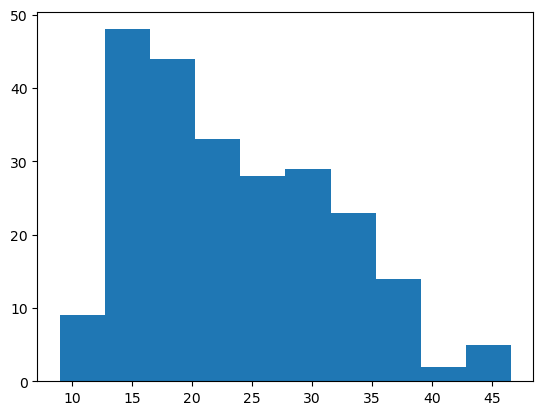

In [57]:
# plotting to look at the data

plt.hist(y_train)

# calling this normal-ish distribution

In [84]:
# calling this normal-ish distribution

tweedie = TweedieRegressor(power = 0)

# fit the created object to trining dataset

tweedie.fit(X_train, y_train)

TweedieRegressor(power=0)

In [85]:
# then predict on X_train

preds_df['tweedie'] = tweedie.predict(X_train)

preds_df.head()

,actual,lm_preds,lasso_preds,polynomial_predictions,lasso_polynomial,tweedie,tweedie2
212,16.5,12.008899,15.378793,17.1250,15.476765,19.790974,19.790974
346,32.3,33.327807,29.134760,32.6250,29.150891,27.220785,27.220785
325,44.3,31.963603,29.755690,36.1250,30.127225,26.852609,26.852609
90,12.0,8.817639,12.855237,8.9375,13.173173,19.299961,19.299961
246,32.8,34.716194,29.938671,40.6250,30.191588,27.407288,27.407288


In [98]:
# check the error

tweedie_norm_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['tweedie']))

tweedie_norm_rmse

5.9264707758233515

In [89]:
# calling this Poisson distribution

tweedie2 = TweedieRegressor(power = 1)

# fit the created object to trining dataset

tweedie2.fit(X_train, y_train)

# then predict on X_train

preds_df['tweedie2'] = tweedie2.predict(X_train)

preds_df.head()



,actual,lm_preds,lasso_preds,polynomial_predictions,lasso_polynomial,tweedie,tweedie2
212,16.5,12.008899,15.378793,17.1250,15.476765,19.790974,14.753256
346,32.3,33.327807,29.134760,32.6250,29.150891,27.220785,32.368355
325,44.3,31.963603,29.755690,36.1250,30.127225,26.852609,31.182495
90,12.0,8.817639,12.855237,8.9375,13.173173,19.299961,13.588848
246,32.8,34.716194,29.938671,40.6250,30.191588,27.407288,33.435556


In [99]:
# check the error

tweedie_poisson_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['tweedie2']))
tweedie_poisson_rmse

4.049857590714997

In [100]:
# compile results into a df

pd.DataFrame({'model' : ['linear', 'lasso', 'linear_poly', 'lasso_poly', 'tweedie_norm', 'tweedie_poisson'],
             'rmse' : [lm_rmse, lasso_rmse, polynomial_rmse, lasso_polynomial_rmse, tweedie_norm_rmse, tweedie_poisson_rmse]})

,model,rmse
0,linear,3.744576
1,lasso,4.487879
2,linear_poly,5.837485
3,lasso_poly,4.447951
4,tweedie_norm,5.926471
5,tweedie_poisson,4.049858


In [103]:
# ake a baseline column based on mean or median of target variable

preds_df['baseline'] = y_train.mean()
preds_df.head()

,actual,lm_preds,lasso_preds,polynomial_predictions,lasso_polynomial,tweedie,tweedie2,baseline
212,16.5,12.008899,15.378793,17.1250,15.476765,19.790974,14.753256,23.50383
346,32.3,33.327807,29.134760,32.6250,29.150891,27.220785,32.368355,23.50383
325,44.3,31.963603,29.755690,36.1250,30.127225,26.852609,31.182495,23.50383
90,12.0,8.817639,12.855237,8.9375,13.173173,19.299961,13.588848,23.50383
246,32.8,34.716194,29.938671,40.6250,30.191588,27.407288,33.435556,23.50383


In [104]:
# finding the error cf the baseline

sqrt(mean_squared_error(preds_df['actual'], preds_df['baseline']))

# This shows that we beat the abseline in all of our models

8.076977144997679